In [1]:
%load_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use(['paper.mplstyle'])

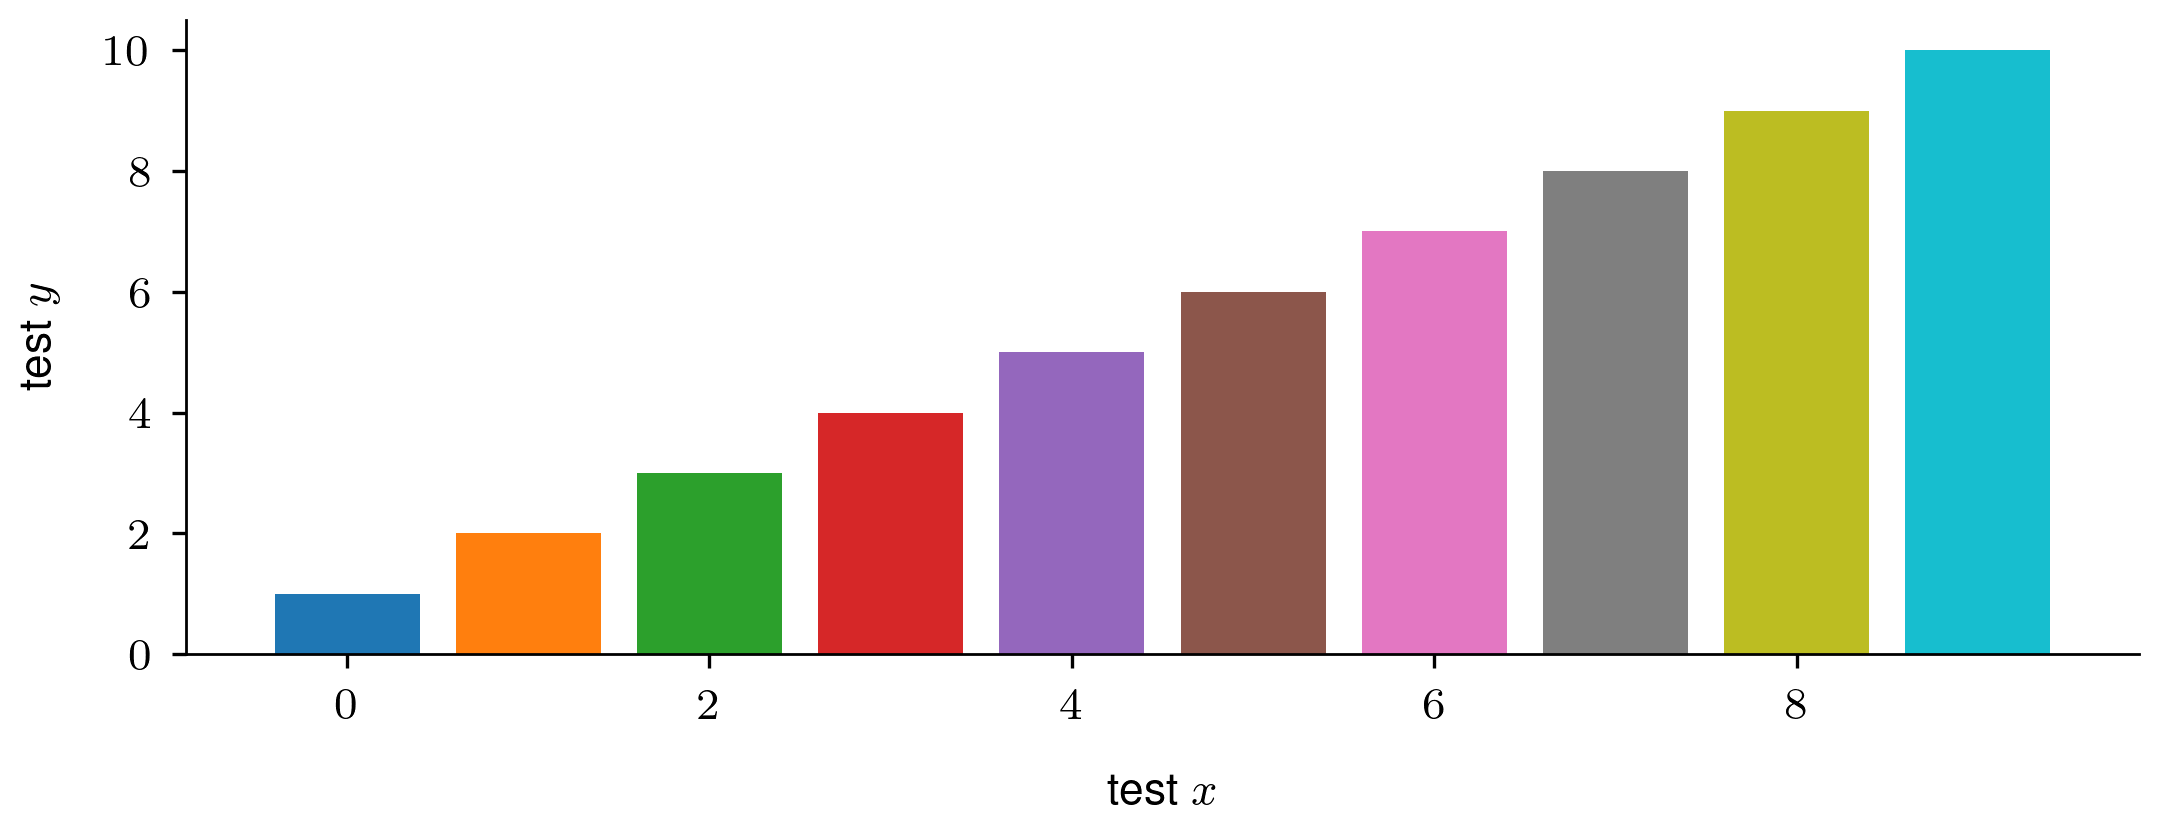

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 8  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles



matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


plt.figure(dpi=400, figsize=(text_width, text_width/3))
for i in range(10):
       plt.bar(i, i + 1, color=f'C{i}', zorder=2)
       # ^ This zorder nonsense makes the grid  lines go behid the bars. I don't know why this is needed for barplots, but shouldn't usually be needed.
# plt.title('\\textbf{Test}, $\\mathcal{C}, \\mathbb{R}$')
plt.xlabel('test $x$')
plt.ylabel('test $y$')
plt.show()

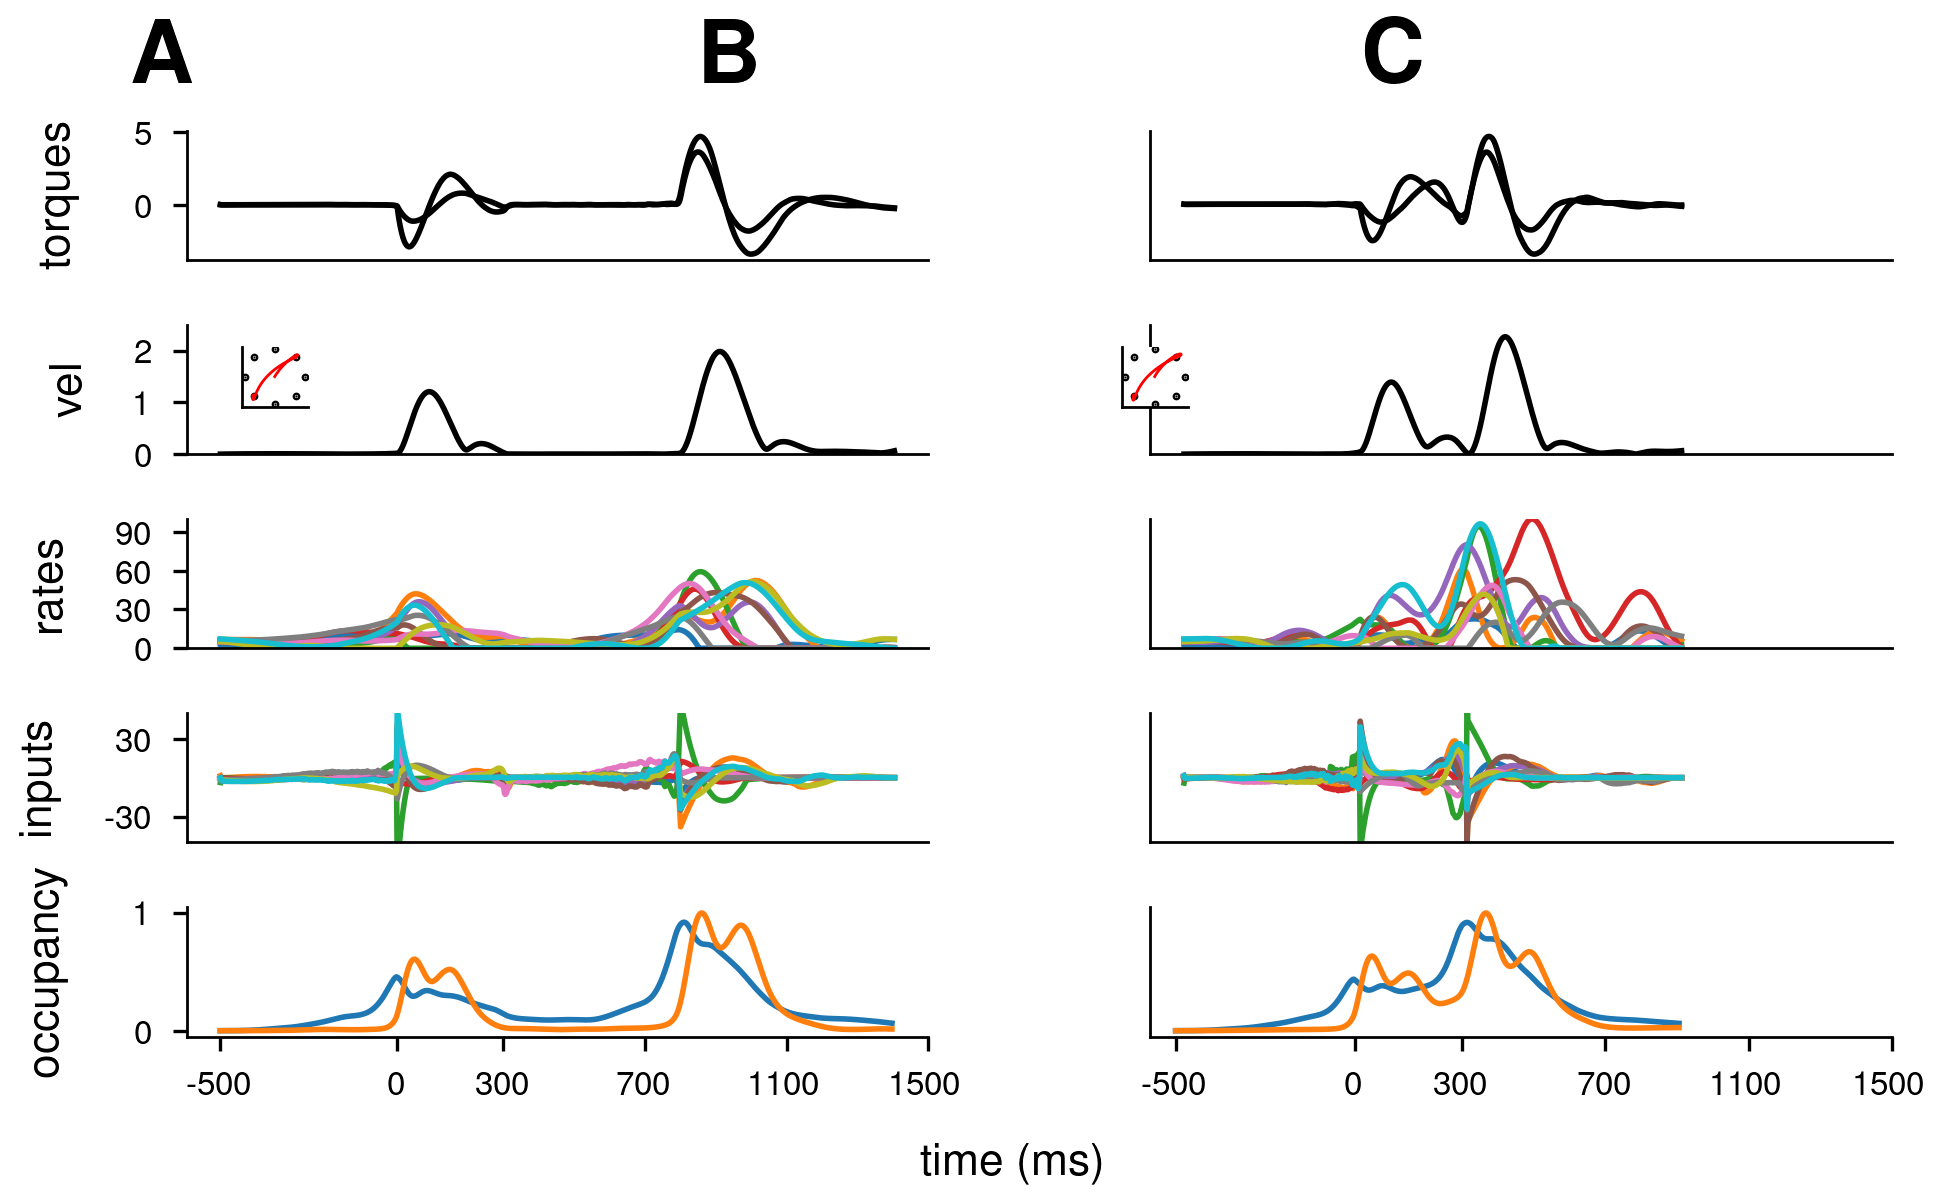

In [4]:
import numpy as np
from matplotlib import pyplot as plt

def dir(s):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{s}_mixed"
def double_dir(s):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{s}_mixed/double_ramping3/pause_0.5_1.0_0.0000002_1.0_10.0"
def compound_dir(s):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{s}_mixed/double_ramping3/pause_0.006_100.0_0.0000002_1.0_10.0"
def compound_pause_dir(s):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{s}_mixed/double_ramping3/pause_0.1_1.0_0.0000002_1.0_10.0"

def vprep_long(s):
    return np.loadtxt(f"{dir(s)}/double_projs_long/vprep")
def vmov_long(s):
    return np.loadtxt(f"{dir(s)}/double_projs_long/vmov")
def vprep_compound(s):
    return np.loadtxt(f"{dir(s)}/double_projs_compound/vprep")
def vmov_compound(s):
    return np.loadtxt(f"{dir(s)}/double_projs_compound/vmov")

vpreps_long = np.concatenate([vprep_long(i)[:,None] for i in range(2)],axis=1)
vpreps_compound = np.concatenate([vprep_compound(i)[:,None] for i in range(2)],axis=1)
vmovs_long = np.concatenate([vmov_long(i)[:,None] for i in range(1)],axis=1)
vmovs_compound = np.concatenate([vmov_compound(i)[:,None] for i in range(1)],axis=1)
vprep_mean_long, vprep_std_long = np.mean(vpreps_long, axis=1), np.std(vpreps_long, axis=1)
vmov_mean_long, vmov_std_long = np.mean(vmovs_long, axis=1), np.std(vmovs_long, axis=1)
vprep_mean_compound, vprep_std_compound = np.mean(vpreps_compound, axis=1), np.std(vpreps_compound , axis=1)
vmov_mean_compound, vmov_std_compound = np.mean(vmovs_compound , axis=1), np.std(vmovs_compound , axis=1)
targets = np.loadtxt(f"{dir(0)}/targets")
hand_targets = np.loadtxt(f"{dir(0)}/hand_targets")

v1 = 1
v2 = 5
us_long = np.loadtxt(f"{double_dir(0)}/us_{v1}_{v2}_500")
rates_long = np.loadtxt(f"{double_dir(0)}/rates_{v1}_{v2}_500")
torques_long =  np.loadtxt(f"{double_dir(0)}/torques_{v1}_{v2}_500")
thetas_long =  np.loadtxt(f"{double_dir(0)}/hands_{v1}_{v2}_500")
us_short = np.loadtxt(f"{compound_dir(0)}/us_{v1}_{v2}_500")
torques_short =  np.loadtxt(f"{compound_dir(0)}/torques_{v1}_{v2}_500")
thetas_short =  np.loadtxt(f"{compound_dir(0)}/hands_{v1}_{v2}_500")
rates_short = np.loadtxt(f"{compound_dir(0)}/rates_{v1}_{v2}_500")

#for now just for visualization
fig, axes = plt.subplots(nrows=5, ncols=2,  figsize=(5.5, 3), dpi = 400)
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

cs = ["darkcyan", "darkorange", 'rosybrown', 'indigo', 'deepskyblue', 'royalblue', 'slategray']
neurons = [0, 8, 11, 20, 44, 100, 101, 144, 198, 199]

max_rate = 100
left, bottom, width, height = [0.15, 0.65, 0.03, 0.05]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(hand_targets[:,0], hand_targets[:,1],'ok', markersize=0.4)
ax2.plot(thetas_long[:,0] - thetas_long[0,0],thetas_long[:,2] - thetas_long[0,2],'r', linewidth=0.5)
ax2.set_xticks([])
ax2.set_yticks([])
axes[0, 0].plot(torques_long[:,0], 'k')
axes[0, 0].plot(torques_long[:,1], 'k')
axes[0,0].set_yticks([-2.5,0,2.5], [-2.5,0,2.5])
axes[0, 0].set_ylabel("torques",  labelpad = 10)
axes[0,0].set_xticks([])
axes[0,0].set_yticks([0,5], [0,5])
axes[1, 0].plot(np.sqrt(thetas_long[:,1]**2 + thetas_long[:,3]**2), 'k')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([0,1,2], [0,1,2])
axes[1, 0].set_ylabel("vel")
axes[1,0].set_ylim(0,2.5)
axes[2, 0].plot(rates_long[:,:10])
axes[2,0].set_xticks([])
axes[2,0].set_yticks([0,30, 60,90], [0,30, 60,90])
axes[2,0].set_ylim(0,max_rate)
axes[2,0].set_ylabel("rates")
axes[3, 0].plot(us_long[:,:10])
axes[3,0].set_ylim(-50,50)
axes[3,0].set_yticks([-30,30], [-30,30])
axes[3,0].set_xticks([])
axes[3,0].set_ylabel("inputs")
axes[4, 0].plot(vprep_mean_long)
axes[4, 0].plot(vmov_mean_long)
axes[4,0].set_yticks([0,1], [0,1])
axes[4,0].set_ylabel("occupancy", labelpad = 12)
axes[4, 0].set_xticks([0,250,400,600, 800, 1000], [-500,0,300,700,1100,1500])
xb, xu = axes[4,0].get_xlim()
left, bottom, width, height = [0.55, 0.65, 0.03, 0.05]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(hand_targets[:,0], hand_targets[:,1],'ok', markersize=0.4)
ax3.plot(thetas_short[:,0] - thetas_short[0,0],thetas_short[:,2] - thetas_short[0,2],'r', linewidth=0.5)
ax3.set_xticks([])
ax3.set_yticks([])
axes[0, 1].plot(torques_short[:,0], 'k')
axes[0, 1].plot(torques_short[:,1], 'k')
axes[0, 1].set_xlim(xb, xu)
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[1, 1].plot(np.sqrt(thetas_short[:,1]**2 + thetas_short[:,3]**2), 'k')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
axes[1,1].set_ylim(0,2.5)
axes[1, 1].set_xlim(xb, xu)
axes[2, 1].plot(rates_short[:,:10])
axes[2,1].set_xticks([])
axes[2,1].set_xlim(xb,xu)
axes[2,1].set_yticks([])
axes[2,1].set_ylim(0,max_rate)
axes[3,1].set_ylim(-50,50)
axes[3, 1].set_xlim(xb, xu)
axes[3, 1].plot(us_short[:,:10])
axes[3,1].set_xticks([])
axes[3,1].set_yticks([])
axes[4, 1].plot(vprep_mean_compound)
axes[4, 1].plot(vmov_mean_compound)
axes[4,1].set_xticks([0,250,400,600, 800, 1000], [-500,0,300,700,1100,1500])
axes[4,1].set_yticks([])


fig.text(0.1, 0.92, '$\\textbf{A}$', size = 16)
fig.text(0.36, 0.92, '$\\textbf{B}$', size = 16)
fig.text(0.66, 0.92, '$\\textbf{C}$', size = 16)
fig.text(0.5, 0.01, 'time (ms)', size = fs, ha='center')
fig.savefig("fig_4_draft.pdf", format = "pdf", bbox_inches='tight')

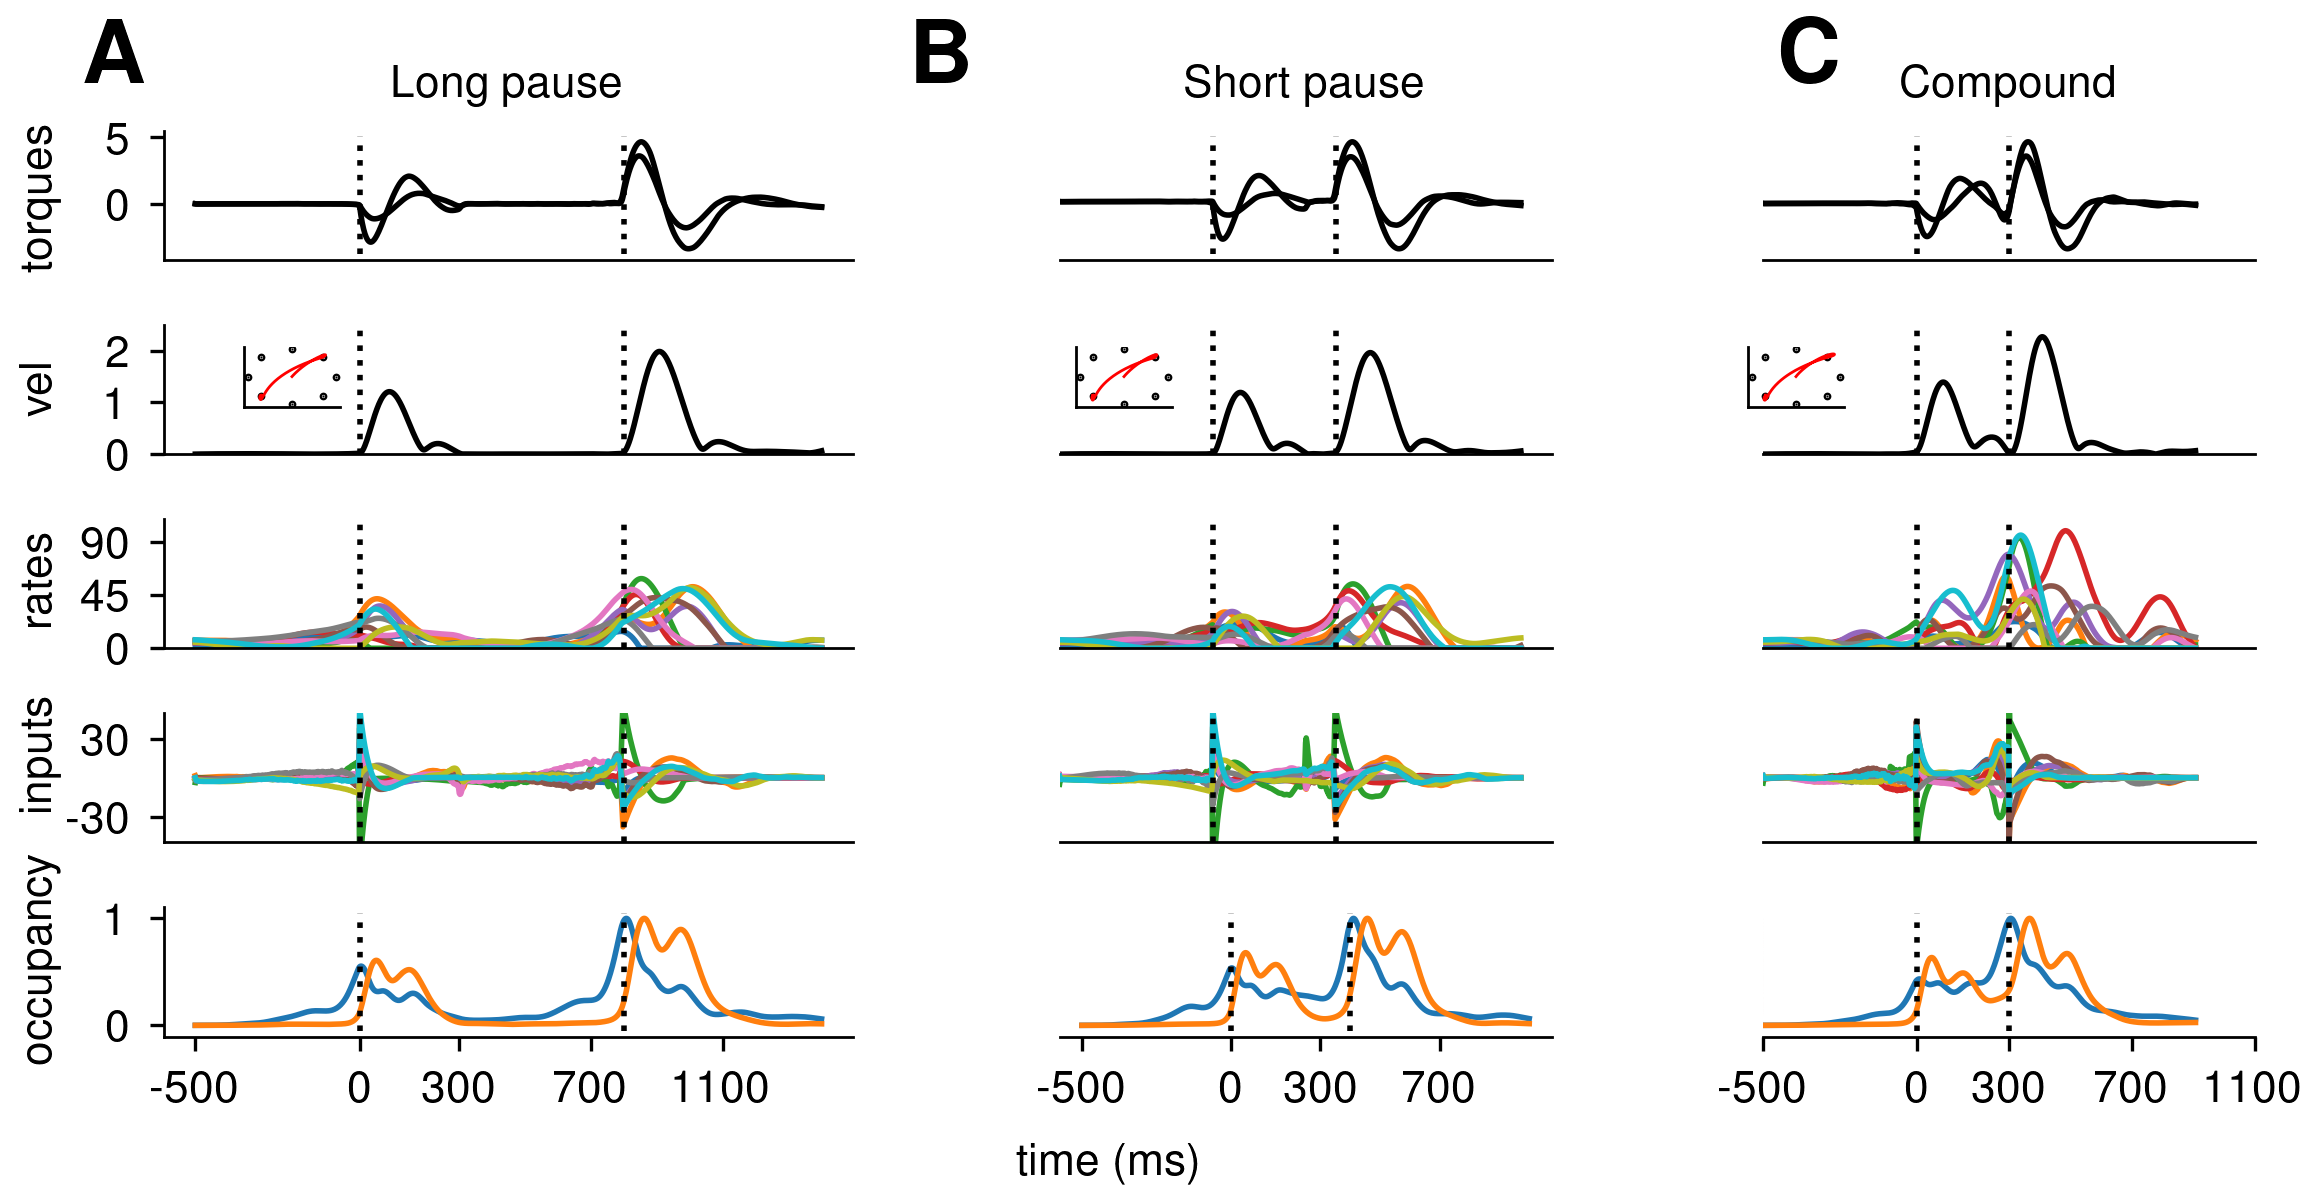

In [12]:
import numpy as np
from matplotlib import pyplot as plt

def dir(s):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{s}_mixed"
def double_dir(s):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{s}_mixed/double_ramping3/pause_0.5_1.0_0.0000002_1.0_10.0"
def compound_dir(s):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{s}_mixed/double_ramping3/pause_0.006_100.0_0.0000002_1.0_10.0"
def compound_pause_dir(s):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{s}_mixed/double_ramping3/pause_0.1_1.0_0.0000002_1.0_10.0"

def vprep_long(s):
    return np.loadtxt(f"{dir(s)}/double_projs_long/vprep")
def vmov_long(s):
    return np.loadtxt(f"{dir(s)}/double_projs_long/vmov")
def vprep_compound(s):
    return np.loadtxt(f"{dir(s)}/double_projs_compound/vprep")
def vmov_compound(s):
    return np.loadtxt(f"{dir(s)}/double_projs_compound/vmov")
def vprep_short_pause(s):
    return np.loadtxt(f"{dir(s)}/double_projs_seq_short/vprep")
def vmov_short_pause(s):
    return np.loadtxt(f"{dir(s)}/double_projs_seq_short/vmov")

def realign(ax, frac, offset=0):
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    current_pos = ax.get_position()
    new_width = frac*current_pos.width
    ax.set_position([current_pos.x0 - offset, current_pos.y0, new_width, current_pos.height])

vpreps_long = np.concatenate([vprep_long(i)[:,None] for i in range(1)],axis=1)
vpreps_compound = np.concatenate([vprep_compound(i)[:,None] for i in range(1)],axis=1)
vpreps_short_pause = np.concatenate([vprep_short_pause(i)[:,None] for i in range(1)],axis=1)
vmovs_long = np.concatenate([vmov_long(i)[:,None] for i in range(1)],axis=1)
vmovs_compound = np.concatenate([vmov_compound(i)[:,None] for i in range(1)],axis=1)
vmovs_short_pause = np.concatenate([vmov_short_pause(i)[:,None] for i in range(1)],axis=1)
vprep_mean_long, vprep_std_long = np.mean(vpreps_long, axis=1), np.std(vpreps_long, axis=1)
vmov_mean_long, vmov_std_long = np.mean(vmovs_long, axis=1), np.std(vmovs_long, axis=1)
vprep_mean_compound, vprep_std_compound = np.mean(vpreps_compound, axis=1), np.std(vpreps_compound , axis=1)
vmov_mean_compound, vmov_std_compound = np.mean(vmovs_compound , axis=1), np.std(vmovs_compound , axis=1)
vprep_mean_short, vprep_std_short= np.mean(vpreps_short_pause, axis=1), np.std(vpreps_short_pause, axis=1)
vmov_mean_short, vmov_std_short = np.mean(vmovs_short_pause, axis=1), np.std(vmovs_short_pause, axis=1)
targets = np.loadtxt(f"{dir(0)}/targets")
hand_targets = np.loadtxt(f"{dir(0)}/hand_targets")

v1 = 1
v2 = 5
us_long = np.loadtxt(f"{double_dir(0)}/us_{v1}_{v2}_500")
rates_long = np.loadtxt(f"{double_dir(0)}/rates_{v1}_{v2}_500")
torques_long =  np.loadtxt(f"{double_dir(0)}/torques_{v1}_{v2}_500")
thetas_long =  np.loadtxt(f"{double_dir(0)}/hands_{v1}_{v2}_500")
us_short = np.loadtxt(f"{compound_dir(0)}/us_{v1}_{v2}_500")
torques_short =  np.loadtxt(f"{compound_dir(0)}/torques_{v1}_{v2}_500")
thetas_short =  np.loadtxt(f"{compound_dir(0)}/hands_{v1}_{v2}_500")
rates_short = np.loadtxt(f"{compound_dir(0)}/rates_{v1}_{v2}_500")
us_short_pause = np.loadtxt(f"{compound_pause_dir(0)}/us_{v1}_{v2}_500")
torques_short_pause =  np.loadtxt(f"{compound_pause_dir(0)}/torques_{v1}_{v2}_500")
thetas_short_pause =  np.loadtxt(f"{compound_pause_dir(0)}/hands_{v1}_{v2}_500")
rates_short_pause = np.loadtxt(f"{compound_pause_dir(0)}/rates_{v1}_{v2}_500")

#for now just for visualization
fig, axes = plt.subplots(nrows=5, ncols=3,  figsize=(8, 3), dpi = 400)
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

cs = ["darkcyan", "darkorange", 'rosybrown', 'indigo', 'deepskyblue', 'royalblue', 'slategray']
neurons = [0, 8, 11, 20, 44, 100, 101, 144, 198, 199]

max_rate = 110
left, bottom, width, height = [0.15, 0.65, 0.03, 0.05]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(hand_targets[:,0], hand_targets[:,1],'ok', markersize=0.4)
ax2.plot(thetas_long[:,0] - thetas_long[0,0],thetas_long[:,2] - thetas_long[0,2],'r', linewidth=0.5)
ax2.set_xticks([])
ax2.set_yticks([])
axes[0, 0].plot(torques_long[:,0], 'k')
axes[0, 0].plot(torques_long[:,1], 'k')
axes[0,0].set_yticks([-2.5,0,2.5], [-2.5,0,2.5])
# axes[0, 0].set_ylabel("torques",  labelpad = 10)
axes[0,0].set_xticks([])
axes[0,0].set_yticks([0,5], [0,5])
axes[1, 0].plot(np.sqrt(thetas_long[:,1]**2 + thetas_long[:,3]**2), 'k')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([0,1,2], [0,1,2])
# axes[1, 0].set_ylabel("vel")
axes[1,0].set_ylim(0,2.5)
axes[2, 0].plot(rates_long[:,:10])
axes[2,0].set_xticks([])
axes[2,0].set_yticks([0,45,90], [0,45,90])
axes[2,0].set_ylim(0,max_rate)
# axes[2,0].set_ylabel("rates")
axes[3, 0].plot(us_long[:,:10])
axes[3,0].set_ylim(-50,50)
axes[3,0].set_yticks([-30,30], [-30,30])
axes[3,0].set_xticks([])
# axes[3,0].set_ylabel("inputs")
axes[4, 0].plot(vprep_mean_long)
axes[4, 0].plot(vmov_mean_long)
axes[4,0].set_yticks([0,1], [0,1])
# axes[4,0].set_ylabel("occupancy", labelpad = 12)
axes[4, 0].set_xticks([0,250,400,600, 800, 1000], [-500,0,300,700,1100,1500])
xb, xu = axes[4,0].get_xlim()
left, bottom, width, height = [0.41, 0.65, 0.03, 0.05]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(hand_targets[:,0], hand_targets[:,1],'ok', markersize=0.4)
ax3.plot(thetas_short_pause[:,0] - thetas_short_pause[0,0],thetas_short_pause[:,2] - thetas_short_pause[0,2],'r', linewidth=0.5)
ax3.set_xticks([])
ax3.set_yticks([])
axes[4, 1].set_xticks([0,250,400,600, 800], [-500,0,300,700,1100])
xb, xu = axes[4,1].get_xlim()
for i in range(5):
    realign(axes[i,1], 10/14)
    realign(axes[i,2], 10/14, offset=0.06)
axes[0, 1].plot(torques_short_pause[:,0], 'k')
axes[0, 1].plot(torques_short_pause[:,1], 'k')
axes[0, 1].set_xlim(xb, xu)
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[1, 1].plot(np.sqrt(thetas_short_pause[:,1]**2 + thetas_short_pause[:,3]**2), 'k')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
axes[1,1].set_ylim(0,2.5)
axes[1, 1].set_xlim(xb, xu)
axes[2, 1].plot(rates_short_pause[:,:10])
axes[2,1].set_xticks([])
axes[2,1].set_xlim(xb,xu)
axes[2,1].set_yticks([])
axes[2,1].set_ylim(0,max_rate)
axes[3,1].set_ylim(-50,50)
axes[3, 1].set_xlim(xb, xu)
axes[3, 1].plot(us_short_pause[:,:10])
axes[3,1].set_xticks([])
axes[3,1].set_yticks([])
axes[4, 1].plot(vprep_mean_short)
axes[4, 1].plot(vmov_mean_short)
axes[4,1].set_xticks([0,250,400,600, 800], [-500,0,300,700,1100])
axes[4,1].set_yticks([])

left, bottom, width, height = [0.62, 0.65, 0.03, 0.05]
ax4 = fig.add_axes([left, bottom, width, height])
ax4.plot(hand_targets[:,0], hand_targets[:,1],'ok', markersize=0.4)
ax4.plot(thetas_short[:,0] -thetas_short[0,0],thetas_short[:,2] -thetas_short[0,2],'r', linewidth=0.5)
ax4.set_xticks([])
ax4.set_yticks([])

axes[0, 2].plot(torques_short[:,0], 'k')
axes[0, 2].plot(torques_short[:,1], 'k')
axes[0, 2].set_xticks([])
axes[0, 2].set_yticks([])
axes[0, 2].set_xlim(xb,xu)
axes[1, 2].plot(np.sqrt(thetas_short[:,1]**2 + thetas_short[:,3]**2), 'k')
axes[1,2].set_xticks([])
axes[1,2].set_ylim(0,2.5)
axes[1,2].set_xlim(xb,xu)
axes[1, 2].set_yticks([])
axes[2, 2].plot(rates_short[:,:10])
axes[2,2].set_xticks([])
axes[2,2].set_yticks([])
axes[2,2].set_ylim(0,max_rate)
axes[2,2].set_xlim(xb,xu)
axes[3, 2].plot(us_short[:,:10])
axes[3,2].set_ylim(-50,50)
axes[3,2].set_yticks([])
axes[3,2].set_xticks([])
axes[3,2].set_xlim(xb,xu)

axes[4, 2].plot(vprep_mean_compound)
axes[4, 2].fill_between(vprep_mean_compound - 1.96*vprep_std_compound, vprep_mean_compound + 1.96*vprep_std_compound)
axes[4, 2].plot(vmov_mean_compound)
axes[4, 2].fill_between(vmov_mean_compound - 1.96*vmov_std_compound, vmov_mean_compound + 1.96*vmov_std_compound)
axes[4,2].set_xlim(xb,xu)
axes[4,2].set_xticks([0,250,400,600, 800], [-500,0,300,700,1100])
axes[4,2].set_yticks([])


############### Set the reach delimitations ###################
axes[0,0].set_title("Long pause")
for i in range(5):
    ymin, ymax = axes[i,0].get_ylim()
    axes[i,0].vlines(250, ymin, ymax, color = "black", linestyle = "dotted")
    axes[i,0].vlines(650, ymin, ymax, color = "black", linestyle = "dotted")

axes[0,1].set_title("Short pause")
for i in range(5):
    ymin, ymax = axes[i,1].get_ylim()
    axes[i,1].vlines(250, ymin, ymax, color = "black", linestyle = "dotted")
    axes[i,1].vlines(450, ymin, ymax, color = "black", linestyle = "dotted")

axes[0,2].set_title("Compound")
for i in range(5):
    ymin, ymax = axes[i,2].get_ylim()
    axes[i,2].vlines(250, ymin, ymax, color = "black", linestyle = "dotted")
    axes[i,2].vlines(400, ymin, ymax, color = "black", linestyle = "dotted")



fig.text(0.08, 0.77, "torques", rotation="vertical", size = fs)
fig.text(0.08, 0.65, "vel", rotation="vertical", size = fs)
fig.text(0.08, 0.475, "rates", rotation="vertical", size = fs)
fig.text(0.08, 0.32, "inputs", rotation="vertical", size = fs)
fig.text(0.08, 0.11, "occupancy", rotation="vertical", size = fs)
fig.text(0.1, 0.92, '$\\textbf{A}$', size = 16)
fig.text(0.36, 0.92, '$\\textbf{B}$', size = 16)
fig.text(0.63, 0.92, '$\\textbf{C}$', size = 16)
fig.text(0.42, 0.01, 'time (ms)', size = fs, ha='center')
fig.savefig("fig_4_draft.pdf", format = "pdf", bbox_inches='tight')

In [11]:
double_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.05_0.0000002_9.0/ramping_soc/seed_5_mixed/double_ramping3/pause_0.2_1.0_0.0000001_1.0_8.0"

plt.figure()
plt.plot(np.loadtxt(f"{double_dir}/rates_{1}_{3}_500"))
plt.show()
plt.close()
plt.plot(hand_targets[:,0], hand_targets[:,1],'ok', markersize=1)
for i in range(8):
    for j in range(3):
        if not (i==j):
            try : 
                m = np.loadtxt(f"{double_dir}/hands_{i}_{j}_500")
                plt.plot(m[:,0] - m[0,0], m[:,2]- m[0,2])
            except : 
                assert True
plt.figure()
for i in range(8):
    for j in range(8):
        try : 
            m = np.loadtxt(f"{double_dir}/hands_{i}_{j}_500")
            plt.plot(m[:,1]**2 + m[:,3]**2)
        except : 
            assert True

FileNotFoundError: /home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.05_0.0000002_9.0/ramping_soc/seed_5_mixed/double_ramping3/pause_0.2_1.0_0.0000001_1.0_8.0/rates_1_3_500 not found.

<Figure size 432x288 with 0 Axes>

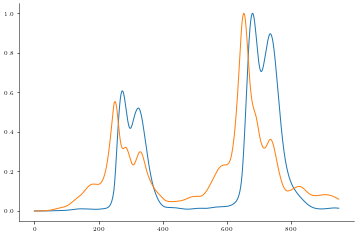

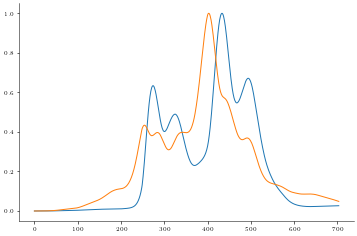

<Figure size 432x288 with 0 Axes>

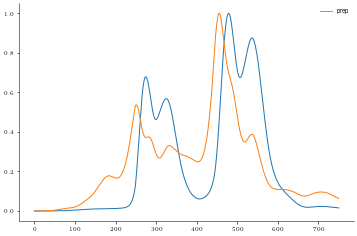

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_projs_long/vmov"))
plt.plot(np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_projs_long/vprep"), label = "prep")
plt.show()
plt.figure()
plt.plot(np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_projs_compound/vmov"))
plt.plot(np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_projs_compound/vprep"), label = "prep")
plt.show()
plt.figure()
plt.plot(np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_projs_seq_short/vmov"))
plt.plot(np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_projs_seq_short/vprep"), label = "prep")
for i in range(8):
    for j in range(8):
        try : 
            m = np.loadtxt(f"{double_dir}/hands_{i}_{j}_500")
            plt.plot(0.1*(m[:,1]**2 + m[:,3]**2), "k")
        except : 
            assert True
plt.legend()
plt.figure()

In [ ]:
double_rates = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.05_0.0000002_9.0/ramping_soc/seed_5_mixed/double_ramping3/pause_0.5_1.0_0.0000001_9.0_1.0_dt/rates_0_1_500")
double_rates_2 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.05_0.0000002_9.0/ramping_soc/seed_5_mixed/double_ramping3/pause_0.5_1.0_0.0000001_9.0_1.0_dt/rates_0_4_500")
single_rates =  np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.05_0.0000002_9.0/ramping_soc/seed_5_mixed/rates_0_500")
colors = ["orange", "red", "blue", "green", "yellow"]
for i in range(2):
    j = i + 1
    plt.plot(2*np.arange(np.shape(double_rates)[0]),double_rates[:,j], color = colors[i])
    plt.plot(2*np.arange(np.shape(double_rates_2)[0]),double_rates_2[:,j], linestyle = "dotted", color = colors[i])
    plt.plot(2*np.arange(np.shape(single_rates)[0]), single_rates[:,j], "--", color = colors[i])


FileNotFoundError: /home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.05_0.0000002_9.0/ramping_soc/seed_5_mixed/double_ramping3/pause_0.5_1.0_0.0000001_9.0_1.0_dt/rates_0_1_500 not found.

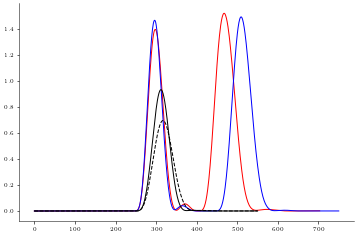

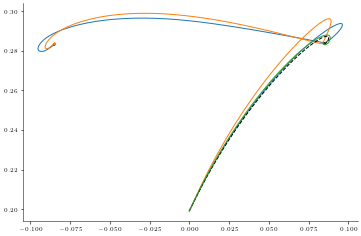

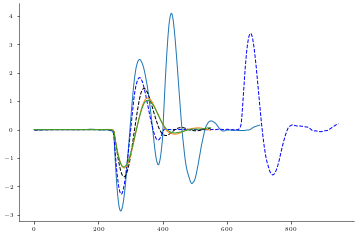

In [ ]:
double_hands = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_ramping3/pause_0.006_100.0_0.0000005_1.0_10.0/hands_1_3_500")
double_hands1 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_ramping3/pause_0.1_1.0_0.0000005_1.0_10.0/hands_1_3_500")
single_hands =  np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/hands_1_500")
single_hands1 =  np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_1_mixed/hands_1_500")
single_hands2 =  np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_2_mixed/hands_1_500")
plt.plot(double_hands[:,1]**2 + double_hands[:,3]**2, "r")
plt.plot(double_hands1[:,1]**2 + double_hands1[:,3]**2, "b")
plt.plot(single_hands[:,1]**2 + single_hands[:,3]**2, "k")
#plt.plot(single_hands1[:,1]**2 + single_hands1[:,3]**2, "--k")
plt.plot(single_hands2[:,1]**2 + single_hands2[:,3]**2, "--k")
plt.figure()
plt.plot(double_hands[:,0], double_hands[:,2])
plt.plot(double_hands1[:,0], double_hands1[:,2])
plt.plot(single_hands[:,0], single_hands[:,2], '--k')
#plt.plot(single_hands1[:,0], single_hands1[:,2])
plt.plot(single_hands2[:,0], single_hands2[:,2])
plt.show()
#########
plt.figure()
double_torques = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_ramping3/pause_0.006_100.0_0.0000005_1.0_10.0/torques_1_5_500")
double_torques1 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_ramping3/pause_0.5_1.0_0.000001_1.0_10.0/torques_1_5_500")
single_torques =  np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/torques_1_500")
single_torques1 =  np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_1_mixed/torques_1_500")
single_torques2 =  np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_2_mixed/torques_1_500")
plt.plot(double_torques[:,1])
plt.plot(double_torques1[:,1], '--b')
plt.plot(single_torques[:,1], 'k--')
plt.plot(single_torques1[:,1])
plt.plot(single_torques2[:,1])

FileNotFoundError: /home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_ramping3/pause_0.5_1.0_0.0000002_1.0_1.0/rates_0_2_500 not found.

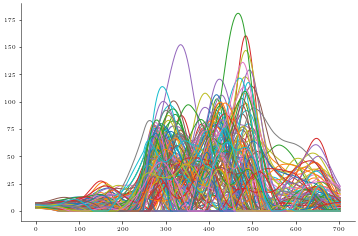

In [ ]:
double_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_ramping3/pause_0.006_100.0_0.0000002_1.0_10.0"
double_dir1 = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/double_ramping3/pause_0.5_1.0_0.0000002_1.0_1.0"
dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.05_0.000005_5.0/ramping_soc/seed_3_mixed"
j = 140
plt.plot(np.loadtxt(f"{double_dir}/rates_0_2_500")[:,:j])
plt.plot(np.loadtxt(f"{double_dir1}/rates_0_2_500")[:,:j], "r")
plt.plot(np.loadtxt(f"{dir}/rates_5_500")[:,:j], "k")

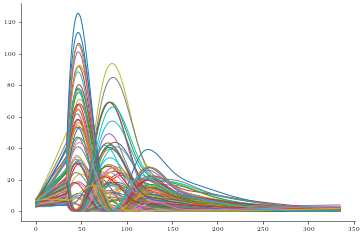

In [ ]:
skew_discrete = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/skew/monkeys_0.05_0.000001_5.0/ramping_skew/1.0_0./rates_4_70")
plt.plot(skew_discrete[:,:100])

[1.5e-01 5.0e-07 5.0e-07 2.0e-03 1.0e-02 5.0e-02]
[1.5e-01 5.0e-07 5.0e-07 2.0e-03 1.0e-02 5.0e-02]


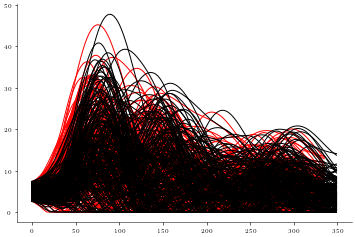

In [ ]:
rates = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/rates_5_70")
prms1 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/prms")
print(prms1)
plt.plot(rates, "r")
rates = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/rates_5_100")
prms2 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/prms")
print(prms2)
plt.plot(rates, "k")

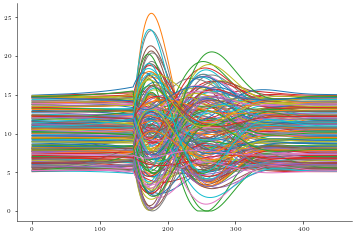

In [ ]:
rates = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_skew/seed_1_mixed/rates_0_300")
plt.plot(rates)